<a href="https://colab.research.google.com/github/Jarvis017/student-performance-classification-with-neural-network/blob/main/Student_Multi_class_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import pandas as pd
import seaborn as sns
import numpy as np
from numpy import mean
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder,normalize
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, normalize
import matplotlib.pyplot as plt
import copy
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense
import matplotlib.pyplot as plt
from keras.layers import Dropout,BatchNormalization
from keras.constraints import maxnorm
from keras.regularizers import l2
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score, KFold

In [ ]:

from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


# preprocessing

### load the data from google drive

In [ ]:
dataset = pd.read_csv('/content/gdrive/My Drive/datasets/xAPI-Edu-Data.csv')
dataset.shape

(480, 17)

### set the attributes of data

In [ ]:
attributes = ['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID', 'SectionID', 'Topic', 'Semester', 'Relation', 'ParentAnsweringSurvey', 'ParentschoolSatisfaction', 'StudentAbsenceDays', 'Class']
le = LabelEncoder()
dataset[attributes] = dataset[attributes].apply(le.fit_transform, axis=0)
dataset.head()


,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,1,4,4,2,1,0,7,0,0,15,16,2,20,1,1,1,2
1,1,4,4,2,1,0,7,0,0,20,20,3,25,1,1,1,2
2,1,4,4,2,1,0,7,0,0,10,7,0,30,0,0,0,1
3,1,4,4,2,1,0,7,0,0,30,25,5,35,0,0,0,1
4,1,4,4,2,1,0,7,0,0,40,50,12,50,0,0,0,2


***Split dataset to Train and Test***





### working on data

In [ ]:
scale = StandardScaler()
X = np.array(dataset.iloc[:, :-1])
y = np.array(dataset['Class'])

# splitting data to train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)
X_train_n, X_test_n, y_train_n, y_test_n = train_test_split(X, y, test_size=0.1, random_state=41)

#Standardizing features
X_train = scale.fit_transform(X_train)
X_test = scale.fit_transform(X_test)
print(type(X_train))
# normalizing inputs
X_train = normalize(X_train)
X_test = normalize(X_test)

y_train = y_train.reshape(y_train.shape[0], 1)
y_test = y_test.reshape(y_test.shape[0], 1)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

<class 'numpy.ndarray'>
(384, 16)
(384, 1)
(96, 16)
(96, 1)


### plotting function

In [ ]:
def plotting(hist):
  plt.plot(hist.history['accuracy'])
  plt.plot(hist.history['val_accuracy'], color = 'red')
  plt.xlabel('epoch')
  plt.ylabel('accuracy')
  plt.title('model accuracy')
  plt.legend(['Train', 'Test'])
  plt.show()
  print()
  print()
  plt.plot(hist.history['loss'])
  plt.plot(hist.history['val_loss'], color = 'red')
  plt.xlabel('epoch')
  plt.ylabel('loss')
  plt.title('model loss')
  plt.legend(['Train', 'Test'])
  plt.show()

###  Precision, Recall and F1 score function

In [ ]:
def f1(model, X_train, X_test, y_train, y_test):
  print()
  print("Train report")
  y_pred = model.predict(X_train)
  y_pred_lable = [np.argmax(i) for i in y_pred]
  print(classification_report(y_train, y_pred_lable))
  print()
  print()
  print("test report")
  y_pred = model.predict(X_test)
  y_pred_lable = [np.argmax(i) for i in y_pred]
  print(classification_report(y_test, y_pred_lable))

### K-Fold function

In [ ]:
def kfold(model,optimizer, X_train, X_test, y_train, y_test,epochs):

  # concat both inputs of train and test
  inputs = np.concatenate((X_train, X_test), axis=0)

  # concat both outputs of train and test
  outputs = np.concatenate((y_train, y_test), axis=0)
  accuracy_per_fold = []
  loss_per_fold = []

  # create kfold with k = 5
  kfold = KFold(n_splits=5, shuffle=True)

  # K-fold Cross Validation model evaluation
  fold_number = 1
  for train, test in kfold.split(inputs, outputs):

    model.compile(loss='sparse_categorical_crossentropy',
                optimizer=optimizer,
                metrics=['accuracy'])

    # train the model
    history = model.fit(inputs[train], outputs[train],epochs=epochs)

    # compute score of the model (loss and accuracy)
    scores = model.evaluate(inputs[test], outputs[test], verbose=0)
    print(f'Score for fold {fold_number}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')

    # draw the confusion matrix
    f1(model, inputs[train], inputs[test], outputs[train], outputs[test])

    # append accuracy and loss of each fold
    accuracy_per_fold.append(scores[1] * 100)
    loss_per_fold.append(scores[0])

    fold_number = fold_number + 1

  print('Average scores for all folds:')

  # calculate mean of all accuracies
  print(f'> Accuracy: {np.mean(accuracy_per_fold)} (+- {np.std(accuracy_per_fold)})')

  # calculate mean of all losses
  print(f'> Loss: {np.mean(loss_per_fold)}')

# Implement model with 4 Layars



### design the model

In [ ]:
model_1 = tf.keras.Sequential()
model_1.add(Dense(50,input_shape = (16,), activation='tanh', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01), use_bias = True))

model_1.add(Dense(50, activation='relu', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01), use_bias = True))

model_1.add(Dense(70, activation='relu', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01), use_bias = True))

model_1.add(Dense(50, activation='relu', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01), use_bias = True))

model_1.add(Dense(3, activation = 'softmax'))
model_1.summary()

Model: "sequential_115"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_733 (Dense)           (None, 50)                850       
                                                                 
 dense_734 (Dense)           (None, 50)                2550      
                                                                 
 dense_735 (Dense)           (None, 70)                3570      
                                                                 
 dense_736 (Dense)           (None, 50)                3550      
                                                                 
 dense_737 (Dense)           (None, 3)                 153       
                                                                 
Total params: 10,673
Trainable params: 10,673
Non-trainable params: 0
_________________________________________________________________


### test the model

In [ ]:
opt = keras.optimizers.RMSprop(learning_rate=0.004)
model_1.compile(loss='sparse_categorical_crossentropy', optimizer = opt, metrics=['accuracy'] )
history_1 = model_1.fit(X_train,y_train,epochs = 400,validation_data = (X_test,y_test))

Epoch 1/400
12/12 [==============================] - 1s 22ms/step - loss: 2.1840 - accuracy: 0.5573 - val_loss: 1.5631 - val_accuracy: 0.7500
Epoch 2/400
12/12 [==============================] - 0s 4ms/step - loss: 1.4014 - accuracy: 0.6615 - val_loss: 1.2311 - val_accuracy: 0.6771
Epoch 3/400
12/12 [==============================] - 0s 4ms/step - loss: 1.0803 - accuracy: 0.7630 - val_loss: 1.0859 - val_accuracy: 0.6354
Epoch 4/400
12/12 [==============================] - 0s 6ms/step - loss: 0.9784 - accuracy: 0.6953 - val_loss: 0.9081 - val_accuracy: 0.6667
Epoch 5/400
12/12 [==============================] - 0s 6ms/step - loss: 0.8909 - accuracy: 0.7214 - val_loss: 0.8793 - val_accuracy: 0.6875
Epoch 6/400
12/12 [==============================] - 0s 4ms/step - loss: 0.8652 - accuracy: 0.7083 - val_loss: 0.8441 - val_accuracy: 0.7500
Epoch 7/400
12/12 [==============================] - 0s 4ms/step - loss: 0.8054 - accuracy: 0.7604 - val_loss: 0.8047 - val_accuracy: 0.7083
Epoch 8/400


### Report

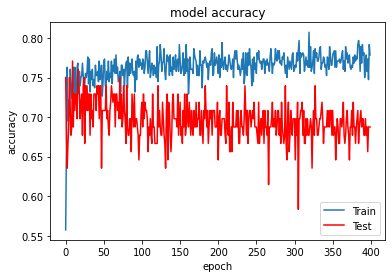

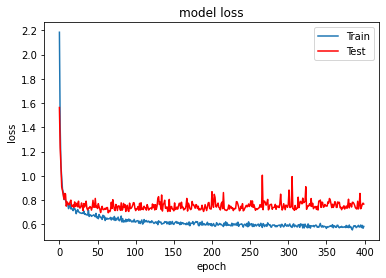


Train report
              precision    recall  f1-score   support

           0       0.71      0.87      0.78       120
           1       0.86      0.91      0.89       103
           2       0.80      0.64      0.71       161

    accuracy                           0.78       384
   macro avg       0.79      0.81      0.79       384
weighted avg       0.79      0.78      0.78       384



test report
              precision    recall  f1-score   support

           0       0.47      0.82      0.60        22
           1       0.84      0.88      0.86        24
           2       0.82      0.54      0.65        50

    accuracy                           0.69        96
   macro avg       0.71      0.74      0.70        96
weighted avg       0.74      0.69      0.69        96



In [ ]:
plotting(history_1)
f1(model_1, X_train, X_test, y_train, y_test)

# Implement model with 6 Layars

### design the model

In [ ]:
model_2 = tf.keras.Sequential()
model_2.add(Dense(20,input_shape = (16,), activation='relu', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model_2.add(Dense(30, activation='relu', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model_2.add(Dense(40, activation='relu', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model_2.add(Dense(50, activation='relu', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model_2.add(Dense(30, activation='relu', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model_2.add(Dense(20, activation='relu', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model_2.add(Dense(3, activation = 'softmax'))
model_2.summary()

Model: "sequential_86"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_527 (Dense)           (None, 20)                340       
                                                                 
 dense_528 (Dense)           (None, 30)                630       
                                                                 
 dense_529 (Dense)           (None, 40)                1240      
                                                                 
 dense_530 (Dense)           (None, 50)                2050      
                                                                 
 dense_531 (Dense)           (None, 30)                1530      
                                                                 
 dense_532 (Dense)           (None, 20)                620       
                                                                 
 dense_533 (Dense)           (None, 3)               

### test the model

In [ ]:
opt = keras.optimizers.RMSprop(learning_rate=0.001)
model_2.compile(loss='sparse_categorical_crossentropy', optimizer = opt, metrics=['accuracy'])
history_2 = model_2.fit(X_train,y_train,epochs = 400,validation_data = (X_test,y_test))

Epoch 1/400
12/12 [==============================] - 2s 24ms/step - loss: 2.7218 - accuracy: 0.4036 - val_loss: 2.5603 - val_accuracy: 0.5208
Epoch 2/400
12/12 [==============================] - 0s 6ms/step - loss: 2.4847 - accuracy: 0.4193 - val_loss: 2.3718 - val_accuracy: 0.5208
Epoch 3/400
12/12 [==============================] - 0s 4ms/step - loss: 2.3114 - accuracy: 0.4193 - val_loss: 2.2069 - val_accuracy: 0.5208
Epoch 4/400
12/12 [==============================] - 0s 5ms/step - loss: 2.1591 - accuracy: 0.4193 - val_loss: 2.0613 - val_accuracy: 0.5208
Epoch 5/400
12/12 [==============================] - 0s 5ms/step - loss: 2.0194 - accuracy: 0.4193 - val_loss: 1.9218 - val_accuracy: 0.5208
Epoch 6/400
12/12 [==============================] - 0s 5ms/step - loss: 1.8880 - accuracy: 0.4193 - val_loss: 1.7879 - val_accuracy: 0.5208
Epoch 7/400
12/12 [==============================] - 0s 4ms/step - loss: 1.7667 - accuracy: 0.4193 - val_loss: 1.6691 - val_accuracy: 0.5208
Epoch 8/400


### Report

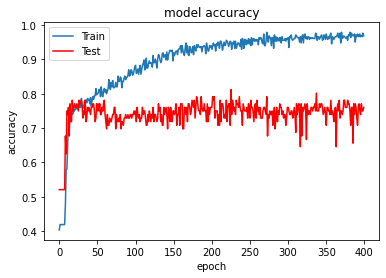

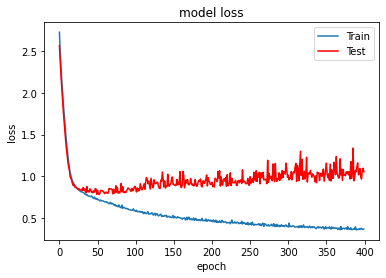


Train report
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       120
           1       0.96      0.99      0.98       103
           2       0.98      0.94      0.96       161

    accuracy                           0.97       384
   macro avg       0.97      0.97      0.97       384
weighted avg       0.97      0.97      0.97       384



test report
              precision    recall  f1-score   support

           0       0.60      0.82      0.69        22
           1       0.77      0.96      0.85        24
           2       0.89      0.64      0.74        50

    accuracy                           0.76        96
   macro avg       0.75      0.81      0.76        96
weighted avg       0.79      0.76      0.76        96



In [ ]:
plotting(history_2)
f1(model_2, X_train, X_test, y_train, y_test)

# Implement model with 7 Layars

### design the model

In [ ]:
model_3 = tf.keras.Sequential()
model_3.add(Dense(30,input_shape = (16,), activation='relu'))
model_3.add(Dense(20, activation='relu', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model_3.add(Dense(40, activation='relu',kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model_3.add(Dense(45, activation='relu', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model_3.add(Dense(40, activation='relu', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model_3.add(Dense(50, activation='relu', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model_3.add(Dense(50, activation='relu', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model_3.add(Dense(3, activation = 'softmax'))
model_3.summary()

Model: "sequential_87"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_534 (Dense)           (None, 30)                510       
                                                                 
 dense_535 (Dense)           (None, 20)                620       
                                                                 
 dense_536 (Dense)           (None, 40)                840       
                                                                 
 dense_537 (Dense)           (None, 45)                1845      
                                                                 
 dense_538 (Dense)           (None, 40)                1840      
                                                                 
 dense_539 (Dense)           (None, 50)                2050      
                                                                 
 dense_540 (Dense)           (None, 50)              

### test the model

In [ ]:
opt = keras.optimizers.Adam(learning_rate=0.0001)
model_3.compile(loss='sparse_categorical_crossentropy', optimizer = opt, metrics=['accuracy'])
history_3 = model_3.fit(X_train,y_train,epochs = 400,validation_data = (X_test,y_test))

Epoch 1/400
12/12 [==============================] - 1s 26ms/step - loss: 3.3774 - accuracy: 0.3932 - val_loss: 3.3553 - val_accuracy: 0.5521
Epoch 2/400
12/12 [==============================] - 0s 6ms/step - loss: 3.3461 - accuracy: 0.4297 - val_loss: 3.3239 - val_accuracy: 0.5208
Epoch 3/400
12/12 [==============================] - 0s 4ms/step - loss: 3.3154 - accuracy: 0.4219 - val_loss: 3.2927 - val_accuracy: 0.5208
Epoch 4/400
12/12 [==============================] - 0s 6ms/step - loss: 3.2851 - accuracy: 0.4193 - val_loss: 3.2622 - val_accuracy: 0.5208
Epoch 5/400
12/12 [==============================] - 0s 5ms/step - loss: 3.2554 - accuracy: 0.4193 - val_loss: 3.2316 - val_accuracy: 0.5208
Epoch 6/400
12/12 [==============================] - 0s 6ms/step - loss: 3.2258 - accuracy: 0.4193 - val_loss: 3.2017 - val_accuracy: 0.5208
Epoch 7/400
12/12 [==============================] - 0s 7ms/step - loss: 3.1967 - accuracy: 0.4193 - val_loss: 3.1722 - val_accuracy: 0.5208
Epoch 8/400


### Report

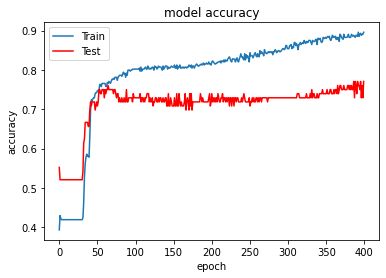

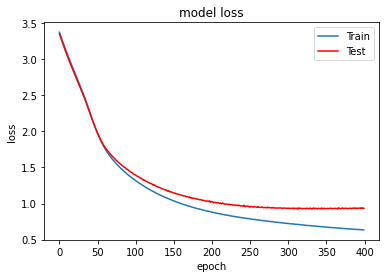


Train report
              precision    recall  f1-score   support

           0       0.85      0.90      0.87       120
           1       0.97      0.95      0.96       103
           2       0.89      0.86      0.88       161

    accuracy                           0.90       384
   macro avg       0.90      0.90      0.90       384
weighted avg       0.90      0.90      0.90       384



test report
              precision    recall  f1-score   support

           0       0.59      0.77      0.67        22
           1       0.88      0.88      0.88        24
           2       0.84      0.72      0.77        50

    accuracy                           0.77        96
   macro avg       0.77      0.79      0.77        96
weighted avg       0.79      0.77      0.77        96



In [ ]:
plotting(history_3)
f1(model_3, X_train, X_test, y_train, y_test)

# Implement model with 7 Layars(Dropout)

### design the model

In [ ]:
model_4 = tf.keras.Sequential()
model_4.add(Dense(40,input_shape = (16,), activation='relu'))
model_4.add(Dropout(0.2))
model_4.add(Dense(50, activation='relu'))
model_4.add(Dropout(0.2))
model_4.add(Dense(40, activation='relu'))
model_4.add(Dropout(0.4))
model_4.add(Dense(50, activation='relu'))
model_4.add(Dropout(0.4))
model_4.add(Dense(70, activation='relu'))
model_4.add(Dropout(0.3))
model_4.add(Dense(40, activation='relu'))
model_4.add(Dropout(0.3))
model_4.add(Dense(50, activation='relu'))
model_4.add(Dropout(0.2))
model_4.add(Dense(3, activation = 'softmax'))
model_4.summary()

Model: "sequential_88"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_542 (Dense)           (None, 40)                680       
                                                                 
 dropout_149 (Dropout)       (None, 40)                0         
                                                                 
 dense_543 (Dense)           (None, 50)                2050      
                                                                 
 dropout_150 (Dropout)       (None, 50)                0         
                                                                 
 dense_544 (Dense)           (None, 40)                2040      
                                                                 
 dropout_151 (Dropout)       (None, 40)                0         
                                                                 
 dense_545 (Dense)           (None, 50)              

### test the model

In [ ]:
opt = keras.optimizers.Adam(learning_rate=0.001)
model_4.compile(loss='sparse_categorical_crossentropy', optimizer = opt, metrics=['accuracy'])
history_4 = model_4.fit(X_train,y_train,epochs = 300,validation_data = (X_test,y_test))

Epoch 1/300
12/12 [==============================] - 1s 20ms/step - loss: 0.1248 - accuracy: 0.9635 - val_loss: 1.5330 - val_accuracy: 0.7292
Epoch 2/300
12/12 [==============================] - 0s 6ms/step - loss: 0.1069 - accuracy: 0.9609 - val_loss: 1.7177 - val_accuracy: 0.7500
Epoch 3/300
12/12 [==============================] - 0s 7ms/step - loss: 0.1548 - accuracy: 0.9609 - val_loss: 1.6823 - val_accuracy: 0.7396
Epoch 4/300
12/12 [==============================] - 0s 6ms/step - loss: 0.0894 - accuracy: 0.9609 - val_loss: 1.7246 - val_accuracy: 0.7188
Epoch 5/300
12/12 [==============================] - 0s 5ms/step - loss: 0.1515 - accuracy: 0.9635 - val_loss: 1.6749 - val_accuracy: 0.7188
Epoch 6/300
12/12 [==============================] - 0s 5ms/step - loss: 0.1412 - accuracy: 0.9505 - val_loss: 1.5280 - val_accuracy: 0.7292
Epoch 7/300
12/12 [==============================] - 0s 7ms/step - loss: 0.0893 - accuracy: 0.9714 - val_loss: 1.5773 - val_accuracy: 0.7292
Epoch 8/300


### Report

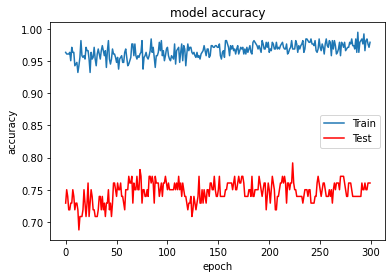

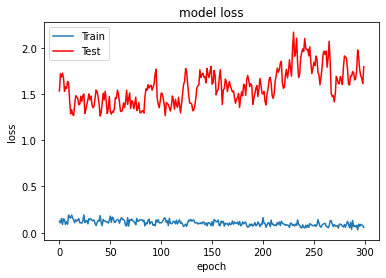


Train report
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       120
           1       1.00      1.00      1.00       103
           2       1.00      0.99      1.00       161

    accuracy                           1.00       384
   macro avg       1.00      1.00      1.00       384
weighted avg       1.00      1.00      1.00       384



test report
              precision    recall  f1-score   support

           0       0.56      0.82      0.67        22
           1       0.88      0.88      0.88        24
           2       0.85      0.68      0.76        50

    accuracy                           0.76        96
   macro avg       0.76      0.79      0.77        96
weighted avg       0.79      0.76      0.77        96



In [ ]:
plotting(history_4)
f1(model_4, X_train, X_test, y_train, y_test)

# Implement model with 6 Layars(Dropout)

### design the model

In [ ]:
model_5 = tf.keras.Sequential()
model_5.add(Dense(70,input_shape = (16,), activation='relu'))
model_5.add(Dropout(0.5))
model_5.add(Dense(40, activation='relu', use_bias = True))
model_5.add(Dropout(0.2))
model_5.add(Dense(40, activation='relu', use_bias = True))
model_5.add(Dropout(0.5))
model_5.add(Dense(50, activation='relu', use_bias = True))
model_5.add(Dropout(0.5))
model_5.add(Dense(60, activation='relu',use_bias = True))
model_5.add(Dropout(0.5))
model_5.add(Dense(40, activation='relu', use_bias = True))
model_5.add(Dropout(0.5))
model_5.add(Dense(3, activation = 'softmax'))
model_5.summary()

Model: "sequential_89"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_550 (Dense)           (None, 70)                1190      
                                                                 
 dropout_156 (Dropout)       (None, 70)                0         
                                                                 
 dense_551 (Dense)           (None, 40)                2840      
                                                                 
 dropout_157 (Dropout)       (None, 40)                0         
                                                                 
 dense_552 (Dense)           (None, 40)                1640      
                                                                 
 dropout_158 (Dropout)       (None, 40)                0         
                                                                 
 dense_553 (Dense)           (None, 50)              

### test the model

In [ ]:
opt = keras.optimizers.Adam(learning_rate=0.001)
model_5.compile(loss='sparse_categorical_crossentropy', optimizer = opt, metrics=['accuracy'])
history_5 = model_5.fit(X_train,y_train,epochs = 100,validation_data = (X_test,y_test))

Epoch 1/100
12/12 [==============================] - 1s 19ms/step - loss: 1.1012 - accuracy: 0.3411 - val_loss: 1.0889 - val_accuracy: 0.5208
Epoch 2/100
12/12 [==============================] - 0s 6ms/step - loss: 1.0838 - accuracy: 0.4167 - val_loss: 1.0836 - val_accuracy: 0.5208
Epoch 3/100
12/12 [==============================] - 0s 4ms/step - loss: 1.0950 - accuracy: 0.3932 - val_loss: 1.0778 - val_accuracy: 0.5208
Epoch 4/100
12/12 [==============================] - 0s 6ms/step - loss: 1.0935 - accuracy: 0.4010 - val_loss: 1.0751 - val_accuracy: 0.5208
Epoch 5/100
12/12 [==============================] - 0s 6ms/step - loss: 1.0892 - accuracy: 0.4062 - val_loss: 1.0730 - val_accuracy: 0.5208
Epoch 6/100
12/12 [==============================] - 0s 5ms/step - loss: 1.0843 - accuracy: 0.4115 - val_loss: 1.0723 - val_accuracy: 0.5208
Epoch 7/100
12/12 [==============================] - 0s 5ms/step - loss: 1.0782 - accuracy: 0.3958 - val_loss: 1.0685 - val_accuracy: 0.5208
Epoch 8/100


### Report

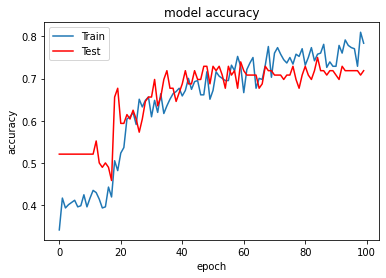

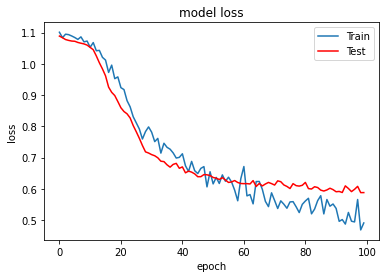


Train report
              precision    recall  f1-score   support

           0       0.79      0.78      0.79       120
           1       0.84      1.00      0.91       103
           2       0.82      0.72      0.77       161

    accuracy                           0.82       384
   macro avg       0.81      0.83      0.82       384
weighted avg       0.81      0.82      0.81       384



test report
              precision    recall  f1-score   support

           0       0.48      0.64      0.55        22
           1       0.85      0.96      0.90        24
           2       0.80      0.64      0.71        50

    accuracy                           0.72        96
   macro avg       0.71      0.74      0.72        96
weighted avg       0.74      0.72      0.72        96



In [ ]:
plotting(history_5)
f1(model_5, X_train, X_test, y_train, y_test)

# Implement model with 3 Layars(Dropout)

### design the model

In [ ]:
model_6 = tf.keras.Sequential()
model_6.add(Dense(25,input_shape = (16,), activation='relu',  kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model_6.add(Dropout(0.2))
model_6.add(Dense(30, activation='relu', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model_6.add(Dropout(0.2))
model_6.add(Dense(40, activation='relu', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model_6.add(Dropout(0.2))
model_6.add(Dense(40, activation='relu', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model_6.add(Dense(3, activation = 'softmax'))
model_6.summary()

Model: "sequential_90"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_557 (Dense)           (None, 25)                425       
                                                                 
 dropout_162 (Dropout)       (None, 25)                0         
                                                                 
 dense_558 (Dense)           (None, 30)                780       
                                                                 
 dropout_163 (Dropout)       (None, 30)                0         
                                                                 
 dense_559 (Dense)           (None, 40)                1240      
                                                                 
 dropout_164 (Dropout)       (None, 40)                0         
                                                                 
 dense_560 (Dense)           (None, 40)              

### test the model

In [ ]:
opt = keras.optimizers.Adam(learning_rate=0.01)
model_6.compile(loss='sparse_categorical_crossentropy', optimizer = opt, metrics=['accuracy'])
history = model_6.fit(X_train,y_train,epochs = 400,validation_data = (X_test,y_test))

Epoch 1/400
12/12 [==============================] - 1s 23ms/step - loss: 1.8382 - accuracy: 0.4193 - val_loss: 1.3652 - val_accuracy: 0.6458
Epoch 2/400
12/12 [==============================] - 0s 4ms/step - loss: 1.1667 - accuracy: 0.5339 - val_loss: 0.9452 - val_accuracy: 0.6875
Epoch 3/400
12/12 [==============================] - 0s 5ms/step - loss: 0.9108 - accuracy: 0.6094 - val_loss: 0.7739 - val_accuracy: 0.7083
Epoch 4/400
12/12 [==============================] - 0s 6ms/step - loss: 0.8559 - accuracy: 0.6120 - val_loss: 0.8058 - val_accuracy: 0.5938
Epoch 5/400
12/12 [==============================] - 0s 6ms/step - loss: 0.8632 - accuracy: 0.5703 - val_loss: 0.8432 - val_accuracy: 0.5625
Epoch 6/400
12/12 [==============================] - 0s 6ms/step - loss: 0.8226 - accuracy: 0.6771 - val_loss: 0.7826 - val_accuracy: 0.6667
Epoch 7/400
12/12 [==============================] - 0s 5ms/step - loss: 0.7675 - accuracy: 0.7135 - val_loss: 0.7223 - val_accuracy: 0.7188
Epoch 8/400


### Report

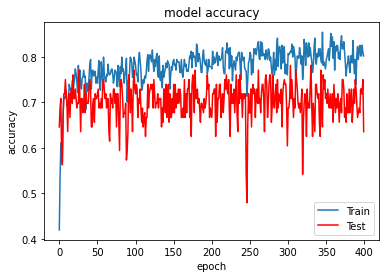

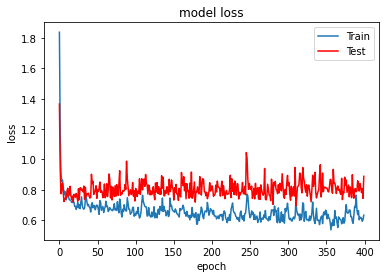


Train report
              precision    recall  f1-score   support

           0       0.75      0.92      0.83       120
           1       0.86      0.99      0.92       103
           2       0.91      0.67      0.77       161

    accuracy                           0.83       384
   macro avg       0.84      0.86      0.84       384
weighted avg       0.85      0.83      0.83       384



test report
              precision    recall  f1-score   support

           0       0.43      0.73      0.54        22
           1       0.74      0.96      0.84        24
           2       0.79      0.44      0.56        50

    accuracy                           0.64        96
   macro avg       0.65      0.71      0.65        96
weighted avg       0.69      0.64      0.63        96



In [ ]:
plotting(history)
f1(model_6, X_train, X_test, y_train, y_test)

# Implement model with 3 Layars(BatchNormalization)

### design the model

In [ ]:
model_7 = tf.keras.Sequential()
model_7.add(Dense(50,input_shape = (16,), activation='relu'))
model_7.add(BatchNormalization())
model_7.add(Dense(30, activation='relu'))
model_7.add(BatchNormalization())
model_7.add(Dense(40, activation='relu'))
model_7.add(BatchNormalization())
model_7.add(Dense(3, activation = 'softmax'))
model_7.summary()

Model: "sequential_91"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_562 (Dense)           (None, 50)                850       
                                                                 
 batch_normalization_48 (Bat  (None, 50)               200       
 chNormalization)                                                
                                                                 
 dense_563 (Dense)           (None, 30)                1530      
                                                                 
 batch_normalization_49 (Bat  (None, 30)               120       
 chNormalization)                                                
                                                                 
 dense_564 (Dense)           (None, 40)                1240      
                                                                 
 batch_normalization_50 (Bat  (None, 40)             

### test the model

In [ ]:
opt = keras.optimizers.SGD(learning_rate=0.001)
model_7.compile(loss='sparse_categorical_crossentropy', optimizer = opt, metrics=['accuracy'])
history = model_7.fit(X_train,y_train,epochs = 400,validation_data = (X_test,y_test))

Epoch 1/400
12/12 [==============================] - 1s 20ms/step - loss: 1.3746 - accuracy: 0.4219 - val_loss: 1.0911 - val_accuracy: 0.4062
Epoch 2/400
12/12 [==============================] - 0s 4ms/step - loss: 1.2935 - accuracy: 0.4688 - val_loss: 1.0736 - val_accuracy: 0.4375
Epoch 3/400
12/12 [==============================] - 0s 4ms/step - loss: 1.2511 - accuracy: 0.4792 - val_loss: 1.0655 - val_accuracy: 0.5208
Epoch 4/400
12/12 [==============================] - 0s 6ms/step - loss: 1.2108 - accuracy: 0.4844 - val_loss: 1.0616 - val_accuracy: 0.4688
Epoch 5/400
12/12 [==============================] - 0s 6ms/step - loss: 1.1565 - accuracy: 0.5000 - val_loss: 1.0589 - val_accuracy: 0.4375
Epoch 6/400
12/12 [==============================] - 0s 4ms/step - loss: 1.0740 - accuracy: 0.5260 - val_loss: 1.0582 - val_accuracy: 0.4271
Epoch 7/400
12/12 [==============================] - 0s 5ms/step - loss: 1.0694 - accuracy: 0.5547 - val_loss: 1.0591 - val_accuracy: 0.3854
Epoch 8/400


### Report

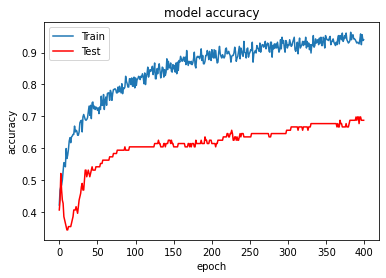

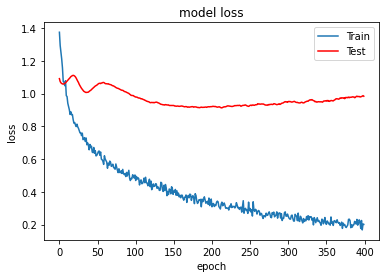


Train report
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       120
           1       1.00      0.98      0.99       103
           2       0.98      0.99      0.98       161

    accuracy                           0.99       384
   macro avg       0.99      0.99      0.99       384
weighted avg       0.99      0.99      0.99       384



test report
              precision    recall  f1-score   support

           0       0.44      0.68      0.54        22
           1       0.88      0.96      0.92        24
           2       0.78      0.56      0.65        50

    accuracy                           0.69        96
   macro avg       0.70      0.73      0.70        96
weighted avg       0.73      0.69      0.69        96



In [ ]:
plotting(history)
f1(model_7, X_train, X_test, y_train, y_test)

# Implement model with 5 Layars(BatchNormalization)

### design the model

In [ ]:
model_8 = tf.keras.Sequential()
model_8.add(Dense(50,input_shape = (16,), activation='relu'))
model_8.add(BatchNormalization())
model_8.add(Dense(30, activation='relu'))
model_8.add(BatchNormalization())
model_8.add(Dense(30, activation='relu'))
model_8.add(BatchNormalization())
model_8.add(Dense(50, activation='relu'))
model_8.add(BatchNormalization())
model_8.add(Dense(50, activation='relu'))
model_8.add(BatchNormalization())
model_8.add(Dense(3, activation = 'softmax'))
model_8.summary()

Model: "sequential_114"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_727 (Dense)           (None, 50)                850       
                                                                 
 batch_normalization_60 (Bat  (None, 50)               200       
 chNormalization)                                                
                                                                 
 dense_728 (Dense)           (None, 30)                1530      
                                                                 
 batch_normalization_61 (Bat  (None, 30)               120       
 chNormalization)                                                
                                                                 
 dense_729 (Dense)           (None, 30)                930       
                                                                 
 batch_normalization_62 (Bat  (None, 30)            

### test the model

In [ ]:
opt = keras.optimizers.Adam(learning_rate=0.001)
model_8.compile(loss='sparse_categorical_crossentropy', optimizer = opt, metrics=['accuracy'])
history = model_8.fit(X_train,y_train,epochs = 400,validation_data = (X_test,y_test))

Epoch 1/400
12/12 [==============================] - 5s 202ms/step - loss: 1.3638 - accuracy: 0.3776 - val_loss: 1.1017 - val_accuracy: 0.2604
Epoch 2/400
12/12 [==============================] - 0s 11ms/step - loss: 0.9471 - accuracy: 0.5599 - val_loss: 1.0946 - val_accuracy: 0.3333
Epoch 3/400
12/12 [==============================] - 0s 9ms/step - loss: 0.7614 - accuracy: 0.6745 - val_loss: 1.0863 - val_accuracy: 0.4688
Epoch 4/400
12/12 [==============================] - 0s 13ms/step - loss: 0.6944 - accuracy: 0.7240 - val_loss: 1.0739 - val_accuracy: 0.5417
Epoch 5/400
12/12 [==============================] - 0s 16ms/step - loss: 0.5696 - accuracy: 0.7839 - val_loss: 1.0586 - val_accuracy: 0.5312
Epoch 6/400
12/12 [==============================] - 0s 13ms/step - loss: 0.5109 - accuracy: 0.8099 - val_loss: 1.0372 - val_accuracy: 0.5000
Epoch 7/400
12/12 [==============================] - 0s 10ms/step - loss: 0.5182 - accuracy: 0.7969 - val_loss: 1.0223 - val_accuracy: 0.5417
Epoch 

### Report

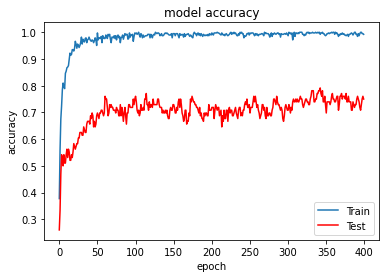

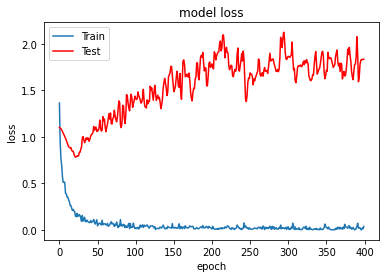


Train report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       120
           1       1.00      1.00      1.00       103
           2       1.00      1.00      1.00       161

    accuracy                           1.00       384
   macro avg       1.00      1.00      1.00       384
weighted avg       1.00      1.00      1.00       384



test report
              precision    recall  f1-score   support

           0       0.56      0.82      0.67        22
           1       0.84      0.88      0.86        24
           2       0.85      0.66      0.74        50

    accuracy                           0.75        96
   macro avg       0.75      0.78      0.76        96
weighted avg       0.78      0.75      0.75        96



In [ ]:
plotting(history)
f1(model_8, X_train, X_test, y_train, y_test)

# Implement model with 4 Layars(BatchNormalization)

### design the model

In [ ]:
model_9 = tf.keras.Sequential()
model_9.add(Dense(50,input_shape = (16,), activation='relu', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model_9.add(BatchNormalization())
model_9.add(Dense(40, activation='relu', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model_9.add(BatchNormalization())
model_9.add(Dense(40, activation='relu', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model_9.add(BatchNormalization())
model_9.add(Dense(40, activation='relu', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model_9.add(BatchNormalization())
model_9.add(Dense(3, activation = 'softmax'))
model_9.summary()

Model: "sequential_116"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_738 (Dense)           (None, 50)                850       
                                                                 
 batch_normalization_65 (Bat  (None, 50)               200       
 chNormalization)                                                
                                                                 
 dense_739 (Dense)           (None, 40)                2040      
                                                                 
 batch_normalization_66 (Bat  (None, 40)               160       
 chNormalization)                                                
                                                                 
 dense_740 (Dense)           (None, 40)                1640      
                                                                 
 batch_normalization_67 (Bat  (None, 40)            

### test the model

In [ ]:
opt = keras.optimizers.SGD(learning_rate=0.001)
model_9.compile(loss='sparse_categorical_crossentropy', optimizer = opt, metrics=['accuracy'])
history = model_9.fit(X_train,y_train,epochs = 400,validation_data = (X_test,y_test))

Epoch 1/400
12/12 [==============================] - 2s 30ms/step - loss: 3.1315 - accuracy: 0.3359 - val_loss: 2.5811 - val_accuracy: 0.1979
Epoch 2/400
12/12 [==============================] - 0s 5ms/step - loss: 3.0281 - accuracy: 0.3255 - val_loss: 2.5740 - val_accuracy: 0.3021
Epoch 3/400
12/12 [==============================] - 0s 5ms/step - loss: 2.9392 - accuracy: 0.3490 - val_loss: 2.5699 - val_accuracy: 0.3438
Epoch 4/400
12/12 [==============================] - 0s 5ms/step - loss: 2.8898 - accuracy: 0.3490 - val_loss: 2.5650 - val_accuracy: 0.3542
Epoch 5/400
12/12 [==============================] - 0s 6ms/step - loss: 2.8086 - accuracy: 0.3984 - val_loss: 2.5600 - val_accuracy: 0.3542
Epoch 6/400
12/12 [==============================] - 0s 6ms/step - loss: 2.7725 - accuracy: 0.4167 - val_loss: 2.5540 - val_accuracy: 0.3854
Epoch 7/400
12/12 [==============================] - 0s 6ms/step - loss: 2.7312 - accuracy: 0.4219 - val_loss: 2.5469 - val_accuracy: 0.3854
Epoch 8/400


### Report

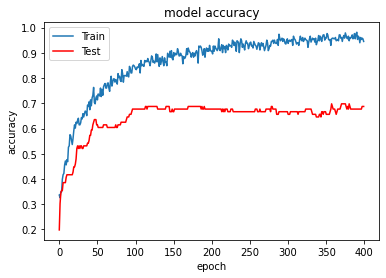

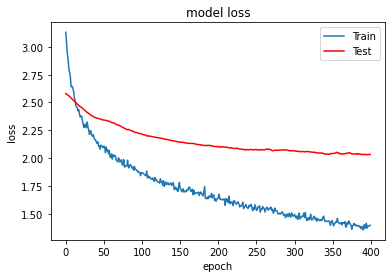


Train report
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       120
           1       1.00      1.00      1.00       103
           2       1.00      0.99      1.00       161

    accuracy                           1.00       384
   macro avg       1.00      1.00      1.00       384
weighted avg       1.00      1.00      1.00       384



test report
              precision    recall  f1-score   support

           0       0.51      0.91      0.66        22
           1       0.77      0.83      0.80        24
           2       0.84      0.52      0.64        50

    accuracy                           0.69        96
   macro avg       0.71      0.75      0.70        96
weighted avg       0.75      0.69      0.68        96



In [ ]:
plotting(history)
f1(model_9, X_train, X_test, y_train, y_test)

# K fold

### First model

In [ ]:
# model with 6 layers
# concat both inputs of train and test
inputs = np.concatenate((X_train, X_test), axis=0)

# concat both outputs of train and test
outputs = np.concatenate((y_train, y_test), axis=0)
accuracy_per_fold = []
loss_per_fold = []

  # create kfold with k = 5
kfold = KFold(n_splits=5, shuffle=True)

# K-fold Cross Validation model evaluation
fold_number = 1
for train, test in kfold.split(inputs, outputs):
  model = tf.keras.Sequential()
  model.add(Dense(20,input_shape = (16,), activation='relu', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
  model.add(Dense(30, activation='relu', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
  model.add(Dense(40, activation='relu', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
  model.add(Dense(50, activation='relu', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
  model.add(Dense(30, activation='relu', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
  model.add(Dense(20, activation='relu', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
  model.add(Dense(3, activation = 'softmax'))
  opt = keras.optimizers.RMSprop(learning_rate=0.001)
  model.compile(loss='sparse_categorical_crossentropy', optimizer = opt, metrics=['accuracy'])

  # train the model
  history = model.fit(inputs[train], outputs[train],epochs=400)

  # compute score of the model (loss and accuracy)
  scores = model.evaluate(inputs[test], outputs[test], verbose=0)
  print(f'Score for fold {fold_number}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')

  # draw the confusion matrix
  f1(model, inputs[train], inputs[test], outputs[train], outputs[test])

  # append accuracy and loss of each fold
  accuracy_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores[0])

  fold_number = fold_number + 1

print('Average scores for all folds:')

# calculate mean of all accuracies
print(f'> Accuracy: {np.mean(accuracy_per_fold)} (+- {np.std(accuracy_per_fold)})')

# calculate mean of all losses
print(f'> Loss: {np.mean(loss_per_fold)}')

Epoch 1/400
12/12 [==============================] - 1s 2ms/step - loss: 2.7033 - accuracy: 0.3438
Epoch 2/400
12/12 [==============================] - 0s 2ms/step - loss: 2.4554 - accuracy: 0.4714
Epoch 3/400
12/12 [==============================] - 0s 2ms/step - loss: 2.2619 - accuracy: 0.4974
Epoch 4/400
12/12 [==============================] - 0s 3ms/step - loss: 2.0855 - accuracy: 0.5859
Epoch 5/400
12/12 [==============================] - 0s 2ms/step - loss: 1.9235 - accuracy: 0.6250
Epoch 6/400
12/12 [==============================] - 0s 2ms/step - loss: 1.7741 - accuracy: 0.6510
Epoch 7/400
12/12 [==============================] - 0s 2ms/step - loss: 1.6426 - accuracy: 0.6953
Epoch 8/400
12/12 [==============================] - 0s 2ms/step - loss: 1.5397 - accuracy: 0.6641
Epoch 9/400
12/12 [==============================] - 0s 2ms/step - loss: 1.4415 - accuracy: 0.6901
Epoch 10/400
12/12 [==============================] - 0s 2ms/step - loss: 1.3652 - accuracy: 0.7083
Epoch 11/

### second model

In [ ]:
# model with 6 layars(Dropout)
# concat both inputs of train and test
inputs = np.concatenate((X_train, X_test), axis=0)

# concat both outputs of train and test
outputs = np.concatenate((y_train, y_test), axis=0)
accuracy_per_fold = []
loss_per_fold = []

# create kfold with k = 5
kfold = KFold(n_splits=5, shuffle=True)

# K-fold Cross Validation model evaluation
fold_number = 1
for train, test in kfold.split(inputs, outputs):


  model = tf.keras.Sequential()
  model.add(Dense(30,input_shape = (16,), activation='relu'))
  model.add(Dense(20, activation='relu', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
  model.add(Dense(40, activation='relu',kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
  model.add(Dense(45, activation='relu', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
  model.add(Dense(40, activation='relu', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
  model.add(Dense(50, activation='relu', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
  model.add(Dense(3, activation = 'softmax'))
  opt = keras.optimizers.Adam(learning_rate=0.001)
  model.compile(loss='sparse_categorical_crossentropy', optimizer = opt, metrics=['accuracy'])

  # train the model
  history = model.fit(inputs[train], outputs[train],epochs=100)

  # compute score of the model (loss and accuracy)
  scores = model.evaluate(inputs[test], outputs[test], verbose=0)
  print(f'Score for fold {fold_number}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')

  # draw the confusion matrix
  f1(model, inputs[train], inputs[test], outputs[train], outputs[test])
  # append accuracy and loss of each fold
  accuracy_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores[0])

  fold_number = fold_number + 1

print('Average scores for all folds:')

# calculate mean of all accuracies
print(f'> Accuracy: {np.mean(accuracy_per_fold)} (+- {np.std(accuracy_per_fold)})')

# calculate mean of all losses
print(f'> Loss: {np.mean(loss_per_fold)}')

Epoch 1/100
12/12 [==============================] - 1s 4ms/step - loss: 2.7886 - accuracy: 0.3620
Epoch 2/100
12/12 [==============================] - 0s 4ms/step - loss: 2.5739 - accuracy: 0.4297
Epoch 3/100
12/12 [==============================] - 0s 4ms/step - loss: 2.3825 - accuracy: 0.4297
Epoch 4/100
12/12 [==============================] - 0s 4ms/step - loss: 2.2086 - accuracy: 0.4297
Epoch 5/100
12/12 [==============================] - 0s 4ms/step - loss: 2.0505 - accuracy: 0.4297
Epoch 6/100
12/12 [==============================] - 0s 4ms/step - loss: 1.9008 - accuracy: 0.4297
Epoch 7/100
12/12 [==============================] - 0s 4ms/step - loss: 1.7441 - accuracy: 0.4896
Epoch 8/100
12/12 [==============================] - 0s 4ms/step - loss: 1.5727 - accuracy: 0.5417
Epoch 9/100
12/12 [==============================] - 0s 4ms/step - loss: 1.4123 - accuracy: 0.6927
Epoch 10/100
12/12 [==============================] - 0s 5ms/step - loss: 1.2833 - accuracy: 0.7396
Epoch 11/

### third model

In [ ]:
# model with 7 layars(Dropout)
# concat both inputs of train and test
inputs = np.concatenate((X_train, X_test), axis=0)

# concat both outputs of train and test
outputs = np.concatenate((y_train, y_test), axis=0)
accuracy_per_fold = []
loss_per_fold = []

  # create kfold with k = 5
kfold = KFold(n_splits=5, shuffle=True)

# K-fold Cross Validation model evaluation
fold_number = 1
for train, test in kfold.split(inputs, outputs):
  model = tf.keras.Sequential()
  model.add(Dense(40,input_shape = (16,), activation='relu'))
  model.add(Dropout(0.2))
  model.add(Dense(50, activation='relu'))
  model.add(Dropout(0.2))
  model.add(Dense(40, activation='relu'))
  model.add(Dropout(0.4))
  model.add(Dense(50, activation='relu'))
  model.add(Dropout(0.4))
  model.add(Dense(70, activation='relu'))
  model.add(Dropout(0.3))
  model.add(Dense(40, activation='relu'))
  model.add(Dropout(0.3))
  model.add(Dense(50, activation='relu'))
  model.add(Dropout(0.2))
  model.add(Dense(3, activation = 'softmax'))
  opt = keras.optimizers.Adam(learning_rate=0.001)
  model.compile(loss='sparse_categorical_crossentropy', optimizer = opt, metrics=['accuracy'])

  # train the model
  history = model.fit(inputs[train], outputs[train],epochs=100)

  # compute score of the model (loss and accuracy)
  scores = model.evaluate(inputs[test], outputs[test], verbose=0)
  print(f'Score for fold {fold_number}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')

  # draw the confusion matrix
  f1(model, inputs[train], inputs[test], outputs[train], outputs[test])

  # append accuracy and loss of each fold
  accuracy_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores[0])

  fold_number = fold_number + 1

print('Average scores for all folds:')

# calculate mean of all accuracies
print(f'> Accuracy: {np.mean(accuracy_per_fold)} (+- {np.std(accuracy_per_fold)})')

# calculate mean of all losses
print(f'> Loss: {np.mean(loss_per_fold)}')

Epoch 1/100
12/12 [==============================] - 1s 3ms/step - loss: 1.0998 - accuracy: 0.3464
Epoch 2/100
12/12 [==============================] - 0s 3ms/step - loss: 1.0879 - accuracy: 0.4349
Epoch 3/100
12/12 [==============================] - 0s 3ms/step - loss: 1.0798 - accuracy: 0.4427
Epoch 4/100
12/12 [==============================] - 0s 2ms/step - loss: 1.0723 - accuracy: 0.4453
Epoch 5/100
12/12 [==============================] - 0s 3ms/step - loss: 1.0596 - accuracy: 0.4479
Epoch 6/100
12/12 [==============================] - 0s 3ms/step - loss: 1.0411 - accuracy: 0.4531
Epoch 7/100
12/12 [==============================] - 0s 3ms/step - loss: 0.9873 - accuracy: 0.4766
Epoch 8/100
12/12 [==============================] - 0s 3ms/step - loss: 0.9125 - accuracy: 0.5495
Epoch 9/100
12/12 [==============================] - 0s 3ms/step - loss: 0.8591 - accuracy: 0.5651
Epoch 10/100
12/12 [==============================] - 0s 2ms/step - loss: 0.7951 - accuracy: 0.5755
Epoch 11/